In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

In [2518]:
class Boid:
    """
    The Boid object keeps track of its position in x and y, velocity in x and y, time_in and time_out
    
    """
    def __init__(self, x, y, v, w):
        self.pos = np.array([x,y])
        self.vel = np.array([v, w])
        self.rad = random.uniform(0.2, 0.05)
        self.tin = -10
        self.tout = -10
        self.isin = False
        self.meas = []
    

In [2520]:
def racetrack(x, y):
    """
    The whole track is surrounded by a large rectangle, for which its size is
    determined by the inner rectangle and size of the large circles.
    There are four types of obstacles/borders which, when the boid is in a relevant domain of the track,
    the distance to the obstacles is determined.
    """
    # Width and height of inner rectangle
    w1 = 4
    h1 = 2.9
    # Thickness of straight parts of track
    ts = 0.8
    # Widest thickness of circular parts of track
    tc = 1.2
    # Radius of large circle
    R = h1/2+ts
    # Centre of large circles:
    cl = np.array([-w1/2-tc+ts, 0])
    cr = np.array([w1/2+tc-ts, 0])
    # Radii of small ellipse
    r1 = (R+(ts-tc)/2)-tc
    r2 = h1/2
    # Width and height of outer rectangle:
    w2 = w1 + 2*R
    h2 = h1+2*ts
    
    def dist_corners(x, y):
        """
        Corners are defined by the four areas between and on the outmost rectangle borders and the two large circles
        Any area within or above the small rectangle will be returned a distance of 10.
        """
        if x < -w1/2:
            if np.sqrt((x-cl[0])**2+y**2) >= R:
                return 0
            else:
                return R - np.sqrt((x-cl[0])**2+y**2)
        elif x > w1/2:
            if np.sqrt((x-cr[0])**2+y**2) >= R:
                return 0
            else:
                return R - np.sqrt((x-cr[0])**2+y**2)
        else:
            return 10
          
    def dist_ellipses(x, y):
        """
        
        """
        if abs(x) > abs(-w1/2-R-0.4):
            return 10
        elif abs(x) > abs(w1/2+R+cr[0]):
            return 10
        elif x < -w1/2:
            if (x+w1/2)**2/r1**2 + y**2/r2**2 <=1:
                return 0
            else:
                origin_dist = np.sqrt((x+w1/2)**2+y**2)
                theta = np.arcsin((x+w1/2)/origin_dist)
                return origin_dist-np.cos(theta)*r2
        elif x > w1/2:
            if (x-w1/2)**2/r1**2 + y**2/r2**2 <=1:
                return 0
            else:
                origin_dist = np.sqrt((x-w1/2)**2+y**2)
                theta = origin_dist-np.arcsin((x-w1/2)/origin_dist)
                return origin_dist-np.cos(theta)*r2 
        else:
            return 10

    def dist_smallrec(x,y):
        """
        Distance to border of innermost rectangle
        """
        if x < -w1/2:
            return 10
        elif x > w1/2:
            return 10
        elif y >= h2/2:
            return 10
        elif y <= -h2/2:
            return 10
        else:
            if y<= h1/2 and y>= -h1/2:
                return 0
            elif y > h1/2:
                return abs(y-h1/2)
            else:
                return abs(y+h1/2)
    
    def dist_largerec(x,y):
        """
        Distance to border of outermostmost rectangle
        """
        if x < -w1/2:
            return 10
        elif x > w1/2:
            return 10
        else:
            if y<= h1/2 and y>= -h1/2:
                return 10
            elif y > h1/2 and y < h2/2:
                return abs(y-h2/2)
            elif y < -h1/2 and y > -h2/2:
                return abs(y+h2/2)   
            else:
                return 0
    return dist_corners(x, y), dist_ellipses(x, y), dist_smallrec(x,y), dist_largerec(x,y)

In [2615]:
def initialize(N, background=False):
    """
    Drop N boids on the racetrack: draw uniformly distributed positions within the large rectangle and make sure that 
    the boids are not located on the border of or in any objects. If this is the case, keep drawing a new position
    until the boid is on the racetrack. Furthermore, any two boids cannot be dropped on the same location!
    The velocity initially will be set to zero.
    """
    boids = []
    def eucl(boid, j):
        centre_dist = np.sqrt((boid.pos[0] -boids[j].pos[0])**2 + (boid.pos[1]-boids[j].pos[1])**2)
        closest_dist = centre_dist - boid.rad - boids[j].rad
        return closest_dist
    
    def is_outborders(x,y):
        if y > 2.5 and y> -2.5 and x < 4.5 and x > -4.5:
            return False
    
    for i in range(N):
        boid = Boid(random.uniform(-4.65, 4.65), random.uniform(-2.25, 2.25), 0.0, 0.0)
        dists = racetrack(boid.pos[0], boid.pos[1])
        if not background:
            if i == 0:
                 while min(dists) ==0 or is_outborders(boid.pos[0], boid.pos[1]):
                        is_outborders(boid.pos[0], boid.pos[1])
                        boid = Boid(random.uniform(-4.25, 4.25), random.uniform(-2.25, 2.25), 0.0, 0.0)
                        dists = racetrack(boid.pos[0], boid.pos[1])
            else:
                boid_dists = [eucl(boid,j) for j in range(len(boids))]
                while min(dists) == 0 or min(boid_dists)<=0.1 or is_outborders(boid.pos[0], boid.pos[1]):
                    is_outborders(boid.pos[0], boid.pos[1])
                    boid = Boid(random.uniform(-4.25, 4.25), random.uniform(-2.25, 2.25), 0.0, 0.0)
                    dists = racetrack(boid.pos[0], boid.pos[1])
                    boid_dists = [eucl(boid,j) for j in range(len(boids))]
        else:
            while min(dists)==0:
                boid = Boid(random.uniform(-4.25, 4.25), random.uniform(-2.25, 2.25), 0.0, 0.0)
                dists = racetrack(boid.pos[0], boid.pos[1])
        boids.append(boid)
    return boids

In [2676]:
def initialize_seyfried(N):
    """
    Drop N boids on the racetrack: Participants are randomly distributed over the MEASURED section..
    """
    boids = []
    MAX_X = 1
    MIN_X = -1
    MAX_Y = -2.9/2
    MIN_Y = MAX_Y-0.8
    def eucl(boid, j):
        centre_dist = np.sqrt((boid.pos[0] -boids[j].pos[0])**2 + (boid.pos[1]-boids[j].pos[1])**2)
        closest_dist = centre_dist - boid.rad - boids[j].rad
        return closest_dist
    
    
    for i in range(N):
        boid = Boid(random.uniform(MIN_X, MAX_X), random.uniform(MIN_Y, MAX_Y), 0.0, 0.0)
        if i > 0:
            boid_dists = [eucl(boid,j) for j in range(len(boids))]
            while min(boid_dists)<=0.01:
                boid = Boid(random.uniform(MIN_X, MAX_X), random.uniform(MIN_Y, MAX_Y), 0.0, 0.0)
                boid_dists = [eucl(boid,j) for j in range(len(boids))]
        boids.append(boid)
            
    return boids

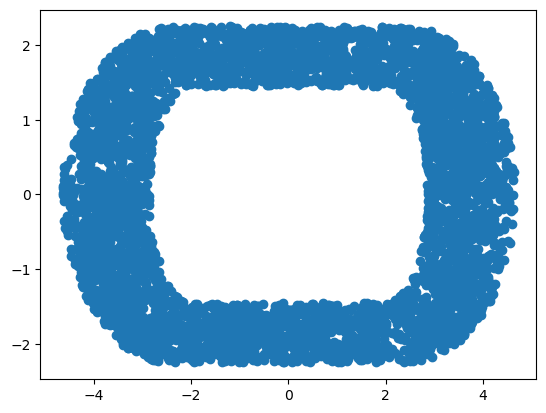

In [2523]:
"""
We demonstrate that the boids are correctly dropped on the racetrack by dropping a large number of boids. 
The trace of the racetrack naturally should show due to the nature of the uniformly drawn positions
"""
boids = initialize(5000, background=True)
plt.scatter([b.pos[0] for b in boids], [b.pos[1] for b in boids])

In [1093]:
def CoM(boids, i, pv = 'POS'):
    """
    Find perceived centre of mass for boid i from list of other boids 
    """
    if pv == 'POS':
        CoX = sum([boids[j].pos[0] for j in range(len(boids)) if j!=i])/(len(boids)-1)
        CoY = sum([boids[j].pos[1] for j in range(len(boids)) if j!=i])/(len(boids)-1)
        return np.array([CoX, CoY])
    elif pv == 'VEL':
        CoX = sum([boids[j].vel[0] for j in range(len(boids)) if j!=i])/(len(boids)-1)
        CoY = sum([boids[j].vel[1] for j in range(len(boids)) if j!=i])/(len(boids)-1)
        return np.array([CoX, CoY])

def Rule1(i, boids, frac=0.1):
    """
    Boid i moves frac*100% towards perceived centre of mass
    """
    C = CoM(boids, i, pv= 'POS')
    return (C - boids[i].pos)*frac

def Rule3(i, boids, frac=0.1):
    """
    Boid i moves frac*100% towards perceived centre of mass
    """
    C = CoM(boids, i, pv= 'VEL')
    return (C - boids[i].vel)*frac

In [2635]:
def Rule2(i, boids, dist=1, frac = 0.1):
    """
    Boid i moves away from other boids within distance dist
    """
    res = np.array([0.0,0.0])
    def eucl(i, j):
        centre_dist = np.sqrt((boids[i].pos[0] -boids[j].pos[0])**2 + (boids[i].pos[1]-boids[j].pos[1])**2)
        closest_dist = centre_dist - boids[i].rad - boids[i].rad
        return closest_dist
    
    for j in range(len(boids)):
        if j!=i: 
            if eucl(i, j) < dist:
                res-= (boids[j].pos - boids[i].pos)/eucl(i,j)
    return res*frac

def Rule4(i, boids, dist=1, frac=0.2):
    """
    Boid i moves away from obstacles within distance dist
    """
    res = np.array([0.0,0.0])
    dists = np.array(racetrack(boids[i].pos[0], boids[i].pos[1])) - boids[i].rad
    x,y = boids[i].pos
    if dists[0] < dist:
        # Move towards the origin of circle
        if x <= 0:
            res+= [-2.4,0] - boids[i].pos
        elif x > 0:
            res+= [2.4,0] - boids[i].pos
    if dists[1] < dist:
        # Move away from origin of ellipse
        if x <= 0:
            res-= [-2,0] - boids[i].pos
        elif x > 0:
            res-= [2,0] - boids[i].pos
            
    if dists[2] < dist:
        # Move towards border of large rectangle
        if y <= 0:
            res+= [boids[i].pos[0], -2.9/2-0.8] - boids[i].pos
        if y > 0:
            res+= [boids[i].pos[0], 2.9/2+0.8] - boids[i].pos
            
    if dists[3] < dist:
        # Move towards border of small rectangle
        if y <= 0:
            res+= [boids[i].pos[0], -2.9/2] - boids[i].pos
        if y > 0:
            res+= [boids[i].pos[0], 2.9/2] - boids[i].pos
    return res*frac

def Rule5(i, boids, frac=0.4):
    """
    Very simplistic four point goal seeking rule (pretend the racetrack is a triangle)
    """
    res = np.array([0.0,0.0])
    if boids[i].pos[0]<-2.85 and boids[i].pos[1]<1.45:
        res+= np.array([-boids[i].vel[0]*2,1])
    elif boids[i].pos[0]<-2.85 and boids[i].pos[1]>1.45:
        res+= np.array([1,-boids[i].vel[1]])
    elif boids[i].pos[0]>2.85 and boids[i].pos[1]>-1.45:
        res+= np.array([-boids[i].vel[0],-1])
    elif boids[i].pos[0]>2.85 and boids[i].pos[1]<-1.45:
        res+= np.array([-1,-boids[i].vel[1]*2])
    elif boids[i].pos[1]<0:
        res+= np.array([-1,-boids[i].vel[1]*2])
    elif boids[i].pos[1]>0:
        res+= np.array([1,-boids[i].vel[1]*2])
    return res*frac
        

In [2784]:
def Rule5_c(i, boids, frac=0.1):
    """
    Goal seeking rule including circular movement and straight path movement. 
    Preferably use over Rule5.
    """
    x, y = boids[i].pos
    res = np.array([0.0,0.0])
    if x >= 2.4:
        a = np.arctan(y/(x-2.4))
        xn = 2.4+ (x-2.4)*np.cos(a) + y*np.sin(a)
        yn = y*np.cos(a) - (x-2.4)*np.sin(a)
        d_x = 2.4 + (xn-2.4)*np.cos(a) - (yn-1)*np.sin(a) - x
        d_y = (yn-1)*np.cos(a) + (xn-2.4)*np.sin(a) - y
        res+= np.array([d_x, d_y])#- boids[i].vel#/(frac*0.4)
    elif x <= -2.4:
        a = np.arctan(y/(x+2.4))
        xn = -2.4+ (x+2.4)*np.cos(a) + y*np.sin(a)
        yn = y*np.cos(a) - (x+2.4)*np.sin(a)
        d_x = -2.4 + (xn+2.4)*np.cos(a) - (yn+1)*np.sin(a) - x
        d_y = (yn+1)*np.cos(a) + (xn+2.4)*np.sin(a) - y
        res+= np.array([d_x, d_y])# - boids[i].vel#/(frac*0.4)
    elif y < 0:
        res+= np.array([-1,0])
    elif y >0:
        res+= np.array([1,0])
    return res*frac

In [ ]:
def vision(boids, i, j):
    """
    We assume that the boid does not have a circular field of vision. 
    Instead it can only see what is +- 90 degrees of its direction it is heading/looking at. 
    This is close to the human field of vision which can see +-95 degrees but has blind spots.
    We assume that the boid can see as far as necessary as the racetrack is not so large that 
    limitations have to be imposed. 
    """
    dist = np.sqrt((boids[i].pos[0]-boids[j].pos[0])**2 + (boids[i].pos[1]-boids[j].pos[1])**2)
    theta = np.arccos(np.dot(boids[i].vel, boids[j].vel)/dist*100)

In [2833]:
MAX_V = 0.6
MAX_A = 0.25
PERSONAL_R = 1

def measure(boids, i, t):
    """
    Keep track of when boids are within measured area at timestep t.
    """
    if boids[i].pos[0]>=-1 and boids[i].pos[0] <=1 and boids[i].pos[1]< 0:
        boids[i].meas.append(True)
    else:
        boids[i].meas.append(False)
        
def simulate(N=10, T=1,is_1 = True, is_2 = True, is_3=True):
    boids = initialize_seyfried(N)
    history = [boids]
    x = []
    y = []
    ns = []
   # plt.scatter([b.pos[0] for b in boids], [b.pos[1] for b in boids])
    for t in range(1, T):
        for i in range(len(boids)):
            v5 = Rule5_c(i, boids, frac=0.1)
            v4 = Rule4(i, boids, dist=0.1, frac=0.1)
            v1 = Rule1(i, boids, frac = 0.1)
            v2 = Rule2(i, boids, dist=PERSONAL_R, frac = 0.1)
            v3 = Rule3(i, boids, frac = 0.1)
            accel = v5 + v4 + int(is_1)*v1 + int(is_2)*v2 + int(is_3)*v3
            sign_a = [np.sign(accel[0]), np.sign(accel[1])]
            accel = np.array([sign_a[0]*min(abs(accel[0]), MAX_A), sign_a[1]*min(abs(accel[1]), MAX_A)])
            #attempt = boids[i].vel + v5 + v4 + int(is_1)*v1 + int(is_2)*v2 + int(is_3)*v3
            attempt = boids[i].vel + accel
            signs = [np.sign(attempt[0]), np.sign(attempt[1])]
            attempt = np.array([signs[0]*min(abs(attempt[0]), MAX_V), signs[1]*min(abs(attempt[1]), MAX_V)])
            #print(attempt)
            boids[i].pos += attempt
            measure(boids, i, t)
        x.append([b.pos[0] for b in boids])
        y.append([b.pos[1] for b in boids])
        history.append(boids)
        #ns.append(len([b for b in boids if b.isin]))
       # plt.scatter([b.pos[0] for b in boids], [b.pos[1] for b in boids])
    return x, y, boids#, ns
    

In [847]:
"""
Background coloring to see racetrack contours
"""
background = initialize(20000, background=True)

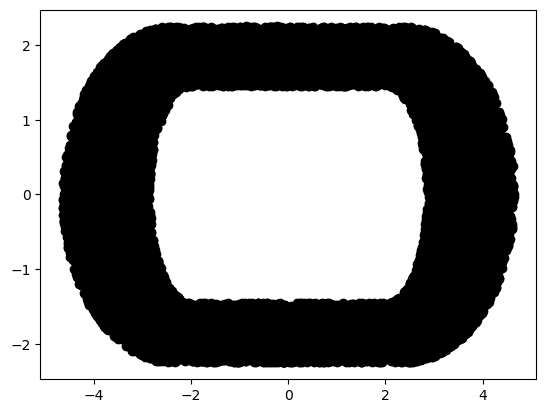

In [2831]:
N = 30
T = 500
plt.scatter([b.pos[0] for b in background], [b.pos[1] for b in background], color = 'black')
x,y, boids= simulate(N,T)

[10, 19]


([5.4,
  6.222222222222222,
  8.222222222222221,
  1.5416666666666667,
  7.625,
  5.0,
  6.625,
  2.5625,
  9.666666666666666,
  6.625,
  6.6,
  4.333333333333333,
  10.0,
  3.764705882352941,
  6.75,
  7.2727272727272725,
  9.909090909090908,
  7.111111111111111,
  2.111111111111111,
  1.8823529411764706,
  6.875,
  3.111111111111111,
  7.625,
  2.5555555555555554,
  8.222222222222221,
  2.272727272727273,
  5.375,
  7.5,
  1.75,
  10.0,
  4.666666666666667,
  6.75,
  10.777777777777779,
  8.916666666666666,
  10.0,
  9.545454545454545,
  8.88888888888889,
  10.5,
  9.11111111111111,
  10.1,
  9.8,
  8.11111111111111,
  4.375,
  8.5,
  8.727272727272727,
  7.4,
  5.222222222222222,
  5.538461538461538,
  4.625,
  2.7777777777777777,
  2.75,
  6.444444444444445,
  3.5,
  7.1,
  8.6,
  10.555555555555555,
  7.75,
  10.0,
  4.916666666666667,
  7.222222222222222,
  9.777777777777779,
  9.125,
  10.625,
  9.375,
  9.6,
  8.454545454545455,
  9.777777777777779,
  10.444444444444445,
  8.66

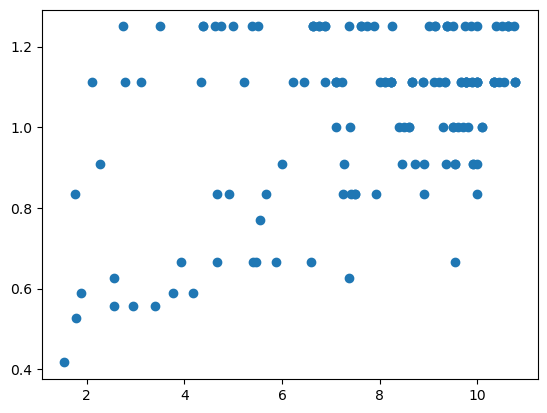

In [2834]:
def FD(boids,Tmin=0, Tmax=1000):
    """
    Plot FD by finding corresponding density and velocity for each passage in chosen subset
    for each boid in boids.
        - boids
        - ns: about of humans present in passage at time t
        - T: optional T parameter to only calculate FD for subset of passages that occured after T
    """
    v = []
    meas = []
    dens = []

    for b in boids:
        tstart = max(1,Tmin)
        while b.meas[tstart]:
            tstart+=1
        current = True
        tin = tstart + 1
        for t in range(tstart, min(Tmax, len(boids[0].meas))):
                if b.meas[t] != current:
                    if current:
                        tout = t
                        
                        density = np.mean([len([bi for bi in boids if bi.meas[t_] and bi!=b]) for t_ in range(tin, tout)])
                        if tout - tin >= 2:
                            v.append(2/(tout-tin))
                            dens.append(density)
                            meas.append([tin, tout])
                    else:
                        tin = t
                    current = b.meas[t]
                    
    # DEBUG:get rid of outliers. Most outliers are 'fast' boids that are not actually that fast
    # but temporarily jump out of the borders of the measured area.
    mean = np.mean(v)
    std = np.std(v)
    is_ = []
    for i in range(len(v)):
        if abs(v[i]) > mean + 2*std:
            is_.append(i)
    v = [v[i]*5 for i in range(len(v)) if i not in is_]
    dens = [dens[i] for i in range(len(dens)) if i not in is_]
    print(is_)
   # fig = plt.figure()
  
   # plt.title('FD diagram for N=' + str(len(boids)), 
       #         fontsize = 14, fontweight ='bold')
  
  #  plt.xlabel('Local boid density')
   # plt.ylabel('Boid velocity')
    plt.scatter(dens, v)
    return dens, v
  #  plt.show()   

FD(boids, Tmin=100, Tmax=1000)
        

In [2749]:
def ablation_fd(T, is_1 = True, is_2 = True, is_3=True, T_a = int(T/5)):
    titlestr = ''
    rules = [is_1, is_2, is_3]
    for i in range(len(rules)):
        rule = rules[i]
        if rule:
            titlestr+= ' ' + str(i+1) + ','
    titlestr = titlestr[:-1]
            
    for N in [5, 10, 15, 20, 25, 30, 35]:
        x, y, boids = simulate(N, T,is_1, is_2, is_3)
        d, v = FD(boids, Tmin=T_a, Tmax = T)
        plt.scatter(d, v, label = 'N = ' + str(N))
    plt.legend()
    if not is_1 and not is_2 and not is_3:
        plt.title('FD for simulations excluding all of Craig\'s rules')
    else:
        plt.title('FD for simulations including rules' + titlestr + '.')
    plt.xlabel('Local boid density')
    plt.ylabel('Boid velocity (m/s)')
    

[3, 7, 8, 9]
[7, 13, 14, 15, 17, 18, 19]
[0, 4]
[5, 19, 93]
[33, 46, 47, 125]
[16, 31, 32, 99, 111, 146]
[38, 46, 47, 90, 92, 102, 109, 135, 147, 171]


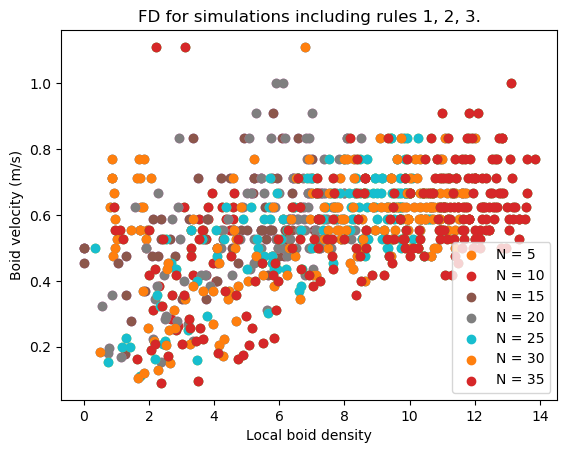

In [2809]:
ablation_fd(1000, is_1 = True, is_2 = True, is_3=True)

[17, 20, 22]
[4, 6, 13, 14, 15, 18, 27, 29, 31, 44, 47]
[2, 3, 7, 13, 18, 28, 32, 42, 52]
[6, 7, 9, 25, 27, 80]
[17, 19, 25, 70, 94, 97]
[41, 49, 50, 67, 115, 147]
[18, 28, 61, 86, 116, 121, 163]


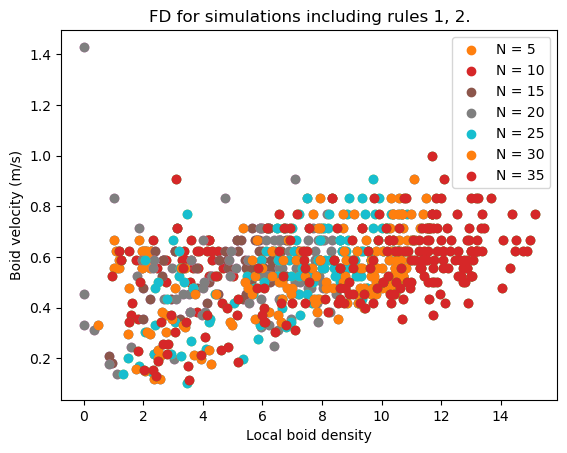

In [2810]:
ablation_fd(1000, is_1 = True, is_2 = True, is_3=False)

[]
[26]
[2, 3]
[25, 28]
[6]
[38, 39, 41]
[55]


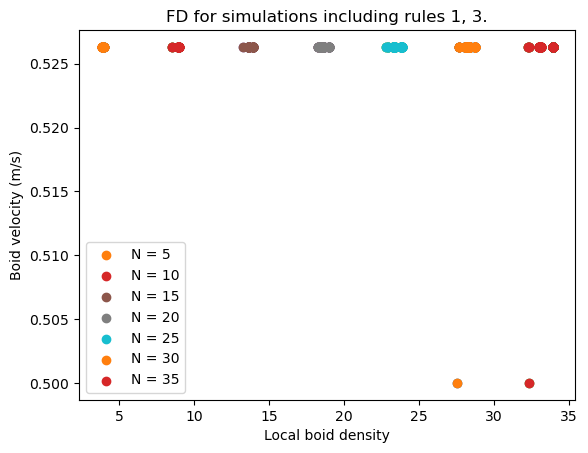

In [2811]:
ablation_fd(1000, is_1 = True, is_2 = False, is_3=True)

[15]
[7]
[10, 27, 53]
[1, 2, 6, 7, 14, 19, 22, 23, 42, 43, 46, 47, 65, 69, 82, 83, 85]
[0, 10, 11, 12, 32, 33, 35, 37, 47, 48, 49, 51, 58, 75, 91, 97, 103, 104, 107, 110, 114, 118, 121, 123, 131]
[9, 10, 16, 17, 44, 60, 66, 116, 118, 126, 140, 152, 153, 156, 160, 163]
[15, 16, 18, 21, 33, 36, 45, 59, 67, 78, 92, 99, 108, 109, 115, 135, 153, 154, 155, 160, 188]


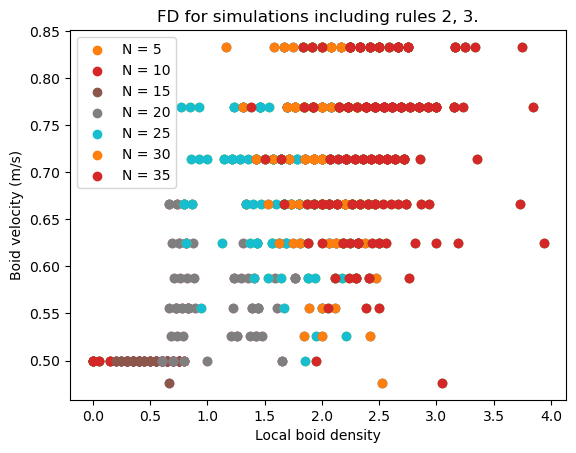

In [2812]:
ablation_fd(1000, is_1 = False, is_2 = True, is_3=True)

[]
[]
[]
[]
[]
[]
[]


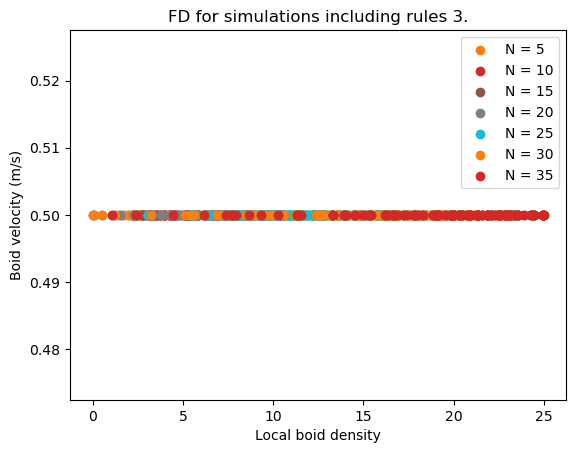

In [2813]:
ablation_fd(1000, is_1 = False, is_2 = False, is_3=True)

[]
[1, 10]
[0, 26, 42]
[3, 12, 13, 16, 18, 39, 42, 44, 64, 67, 68, 75, 77, 91, 95]
[6, 12, 17, 37, 39, 42, 43, 46, 48, 50, 53, 56, 79, 82, 85, 106, 112, 117]
[9, 19, 20, 29, 31, 32, 35, 36, 39, 58, 93, 95, 116, 119, 120, 127]
[11, 12, 69, 77, 78, 86, 90, 91, 126, 142, 145, 182, 190, 197]


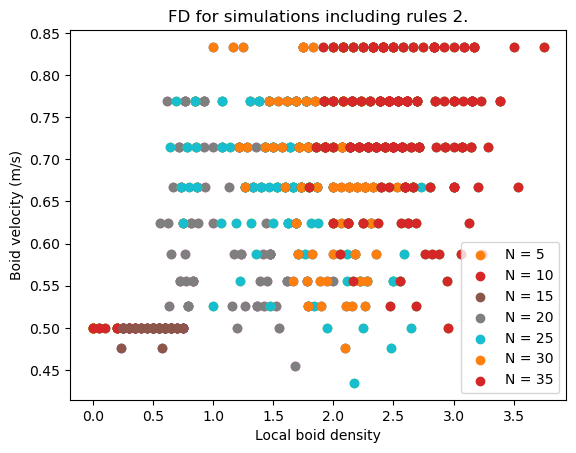

In [2814]:
ablation_fd(1000, is_1 = False, is_2 = True, is_3=False)

[]
[8]
[]
[12, 49]
[44]
[59]
[8, 11, 14]


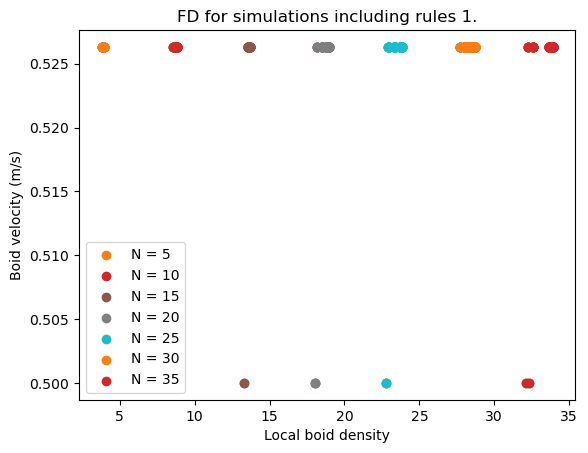

In [2816]:
ablation_fd(1000, is_1 = True, is_2 = False, is_3=False)

[]
[]
[]
[]
[]
[]
[]


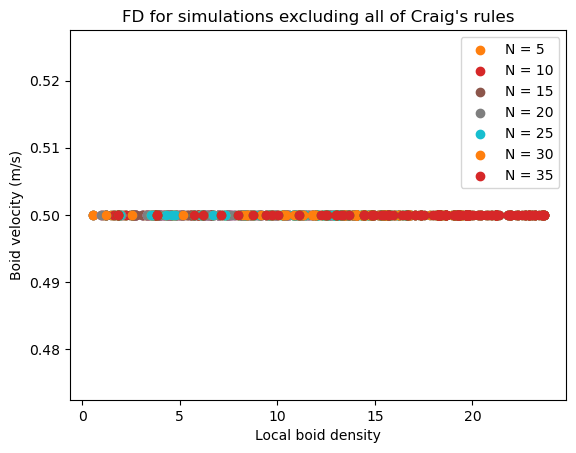

In [2815]:
ablation_fd(1000, is_1 = False, is_2 = False, is_3=False)

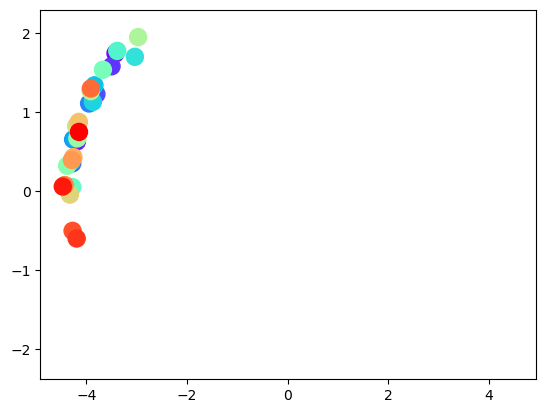

In [2824]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

import matplotlib.animation as animation
from IPython.display import HTML

numpoints = N
colors = cm.rainbow(np.linspace(0, 1, numpoints))
camera = Camera(plt.figure())
for i in range(0,T-1):
    points = (x[i], y[i])
    plt.scatter(*points, c=colors, s=150)
    camera.snap()
anim = camera.animate(blit=True)
HTML(anim.to_jshtml()) 
anim.save('dynamic_images.gif')